# 数据挖掘——Wine Reviews数据集分析

## 一、数据概览

    （未命名）序号，不考虑
    
    country
    葡萄酒来自的国家

    description
    描述
    显然，不同葡萄酒的描述均不同，不考虑

    designation
    酿酒厂内的葡萄园，酿酒的葡萄来自该葡萄园

    points
    WineEnthusiast对葡萄酒的评分为1-100分（他们说，他们只发表分数大于等于80的葡萄酒的评论）

    price
    一瓶酒的成本

    province
    葡萄酒来自的省份/州

    region_1
    葡萄酒产区（省份/州）

    region_2
    有时，在葡萄酒种植区中指定了更特定的区域（例如，纳帕谷内的卢瑟福），但是此值有时可以为空

    taster_name
    品名

    taster_twitter_handle
    品酒师的twitter
    
    title
    葡萄酒评论的标题，如果您有兴趣提取该功能，通常会包含年份

    variety
    用于酿造葡萄酒的葡萄类型（即黑比诺）

    winery
    酿造葡萄酒的酿酒厂

## 二、读取数据

In [1]:
filename = 'winemag-data-130k-v2.csv'

In [2]:
import pandas as pd
data = pd.read_csv(filename)

data.head()    #显示前5行

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
data.info()    #样本数据的相关信息概览

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


去除显然为独特信息，无法依靠统计填补缺失的（未命名列）序号、description列数据

In [4]:
#去除显然为独特信息，无法依靠统计填补缺失的（未命名列）序号、description列数据
data = data.drop(columns=['Unnamed: 0','description'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   designation            92506 non-null   object 
 2   points                 129971 non-null  int64  
 3   price                  120975 non-null  float64
 4   province               129908 non-null  object 
 5   region_1               108724 non-null  object 
 6   region_2               50511 non-null   object 
 7   taster_name            103727 non-null  object 
 8   taster_twitter_handle  98758 non-null   object 
 9   title                  129971 non-null  object 
 10  variety                129970 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


## 三、数据可视化和摘要

### 3.1 标称属性

    对于每个标称属性：
    分别打印其每个可能所出现的频数
    并将其可视化

In [5]:
title = ['country','designation', 'province', 'region_1', 'region_2','taster_name','taster_twitter_handle','title', 'variety', 'winery']

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


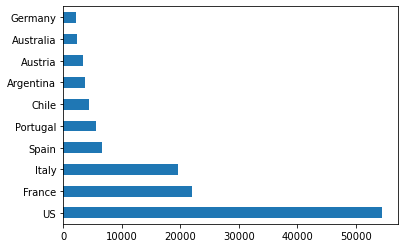

In [6]:
#由于功能重复，仅显示一个标称属性‘country’的频数统计和可视化，可通过更改i的值显示其他属性
i = 0
print(title[i])
print(getattr(data, title[i]).value_counts())
data[title[i]].value_counts().head(10).plot.barh()

### 3.2 数值属性

#### 3.2.1 五数概括

##### describe()函数

    功能：直接给出样本数据的一些基本的统计量，包括均值，标准差，最大值，最小值，分位数等。

    使用格式：data.describe()

In [7]:
data.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


    可得两个数值属性points与price的五数概括：
    points：
        最小值：80
        最大值：100
        四分位数（Q1）：86
        中位数：88
        四分位数（Q3）：91
    price：
        最小值：4
        最大值：3300
        四分位数（Q1）：17
        中位数：25
        四分位数（Q3）：42

#### 3.2.2 缺失值个数统计

In [8]:
print('缺失值：')
print('points:',data['points'].isnull().sum())
print('price:',data['price'].isnull().sum())

缺失值：
points: 0
price: 8996


    可得两个数值属性points与price的缺失值：
    points：0
    price：8996

#### 3.2.3 数据可视化

##### 直方图

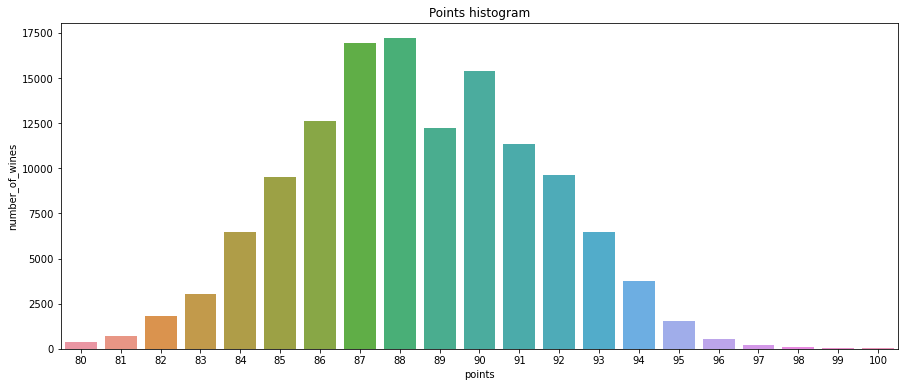

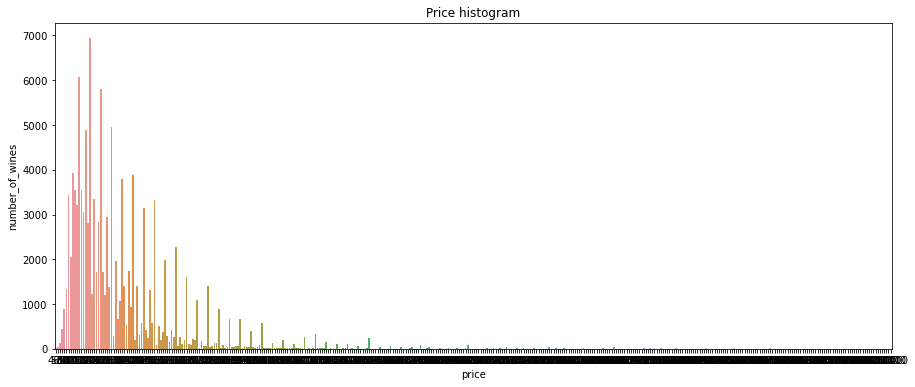

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def histogram(data, x, y ,title):
    plt.figure(figsize = (15,6))
    plt.title(title)
    sns.set_color_codes("pastel")
    sns.barplot(x=x, y=y, data=df)
    locs, labels = plt.xticks()
    plt.show()

#points
temp = data['points'].value_counts()
df = pd.DataFrame({'points':temp.index, 'number_of_wines':temp.values})

histogram(df, 'points', 'number_of_wines', 'Points histogram')

#price
temp = data['price'].value_counts()
df = pd.DataFrame({'price':temp.index, 'number_of_wines':temp.values})

histogram(df, 'price', 'number_of_wines', 'Price histogram')

由于price集中在图的左侧，为了便于观察price的变化，只考虑<200的price，重新绘制直方图

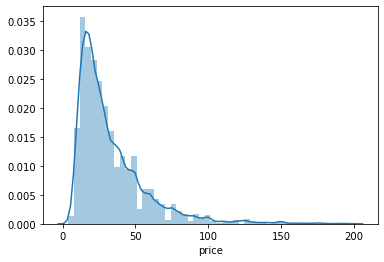

In [10]:
#price(<200)
temp = sns.distplot(data[data["price"]<200]['price'])

##### 盒图

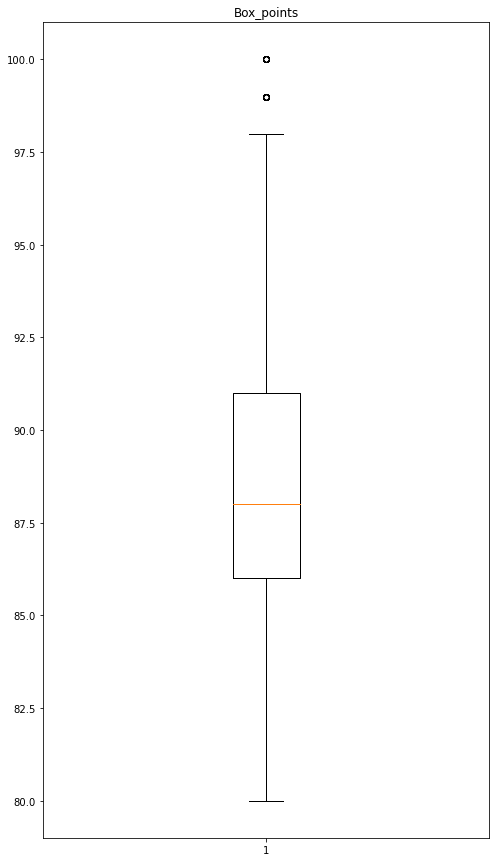

In [11]:
#points
fig = plt.figure(figsize=(8, 15))
plt.boxplot(data['points'], notch=False, sym='o', vert=True)
t = plt.title('Box_points')
plt.show()

同样为了便于观察price的变化，只考虑<200的price，重新绘制盒图

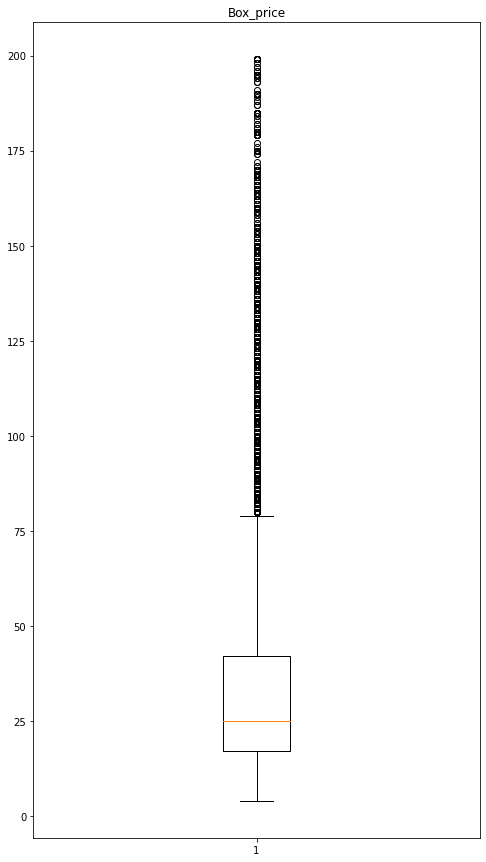

In [12]:
#price
fig = plt.figure(figsize=(8, 15))
plt.boxplot(data['price'].loc[data['price']<200], notch=False, sym='o', vert=True)
t = plt.title('Box_price')
plt.show()

## 四、数据缺失的处理

### 4.1 将缺失部分剔除

In [13]:
#将缺失部分剔除函数
def modify_delete(data):
    data_delete = data.dropna()
    return data_delete

In [14]:
#以points为例
data_delete = modify_delete(data['points'])

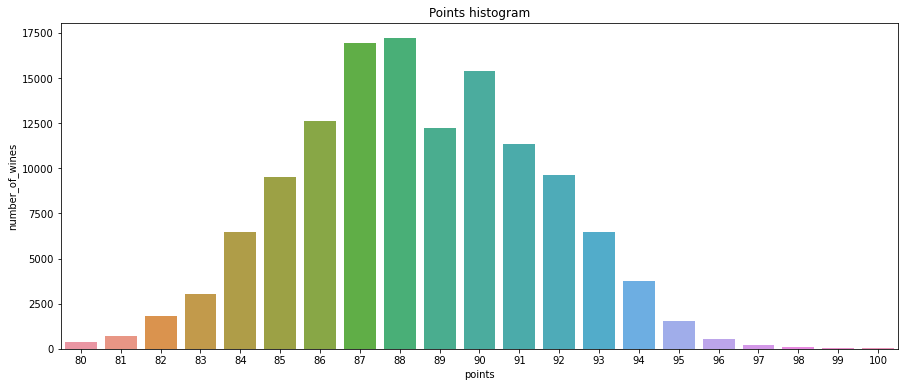

In [15]:
#直方图
temp = data_delete.value_counts()
df = pd.DataFrame({'points':temp.index, 'number_of_wines':temp.values})

histogram(df, 'points', 'number_of_wines', 'Points histogram')

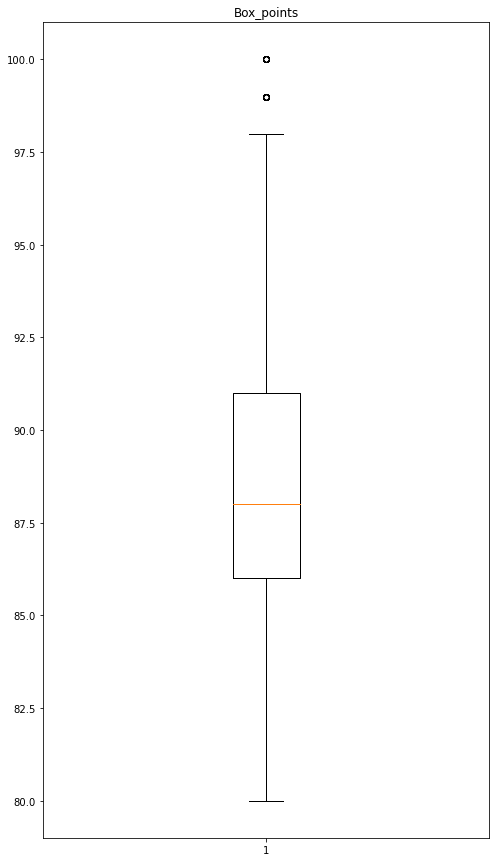

In [16]:
#盒图
fig = plt.figure(figsize=(8, 15))
plt.boxplot(data_delete, notch=False, sym='o', vert=True)
t = plt.title('Box_points')
plt.show()

### 4.2 用最高频率值来填补缺失值

In [17]:
#以最高频率值填补缺失值函数
def modify_most(data):
    temp = data.mode()[0]    #求众数
    data_most = data.fillna(temp)
    return data_most

In [18]:
#以points为例
data_most = modify_most(data['points'])

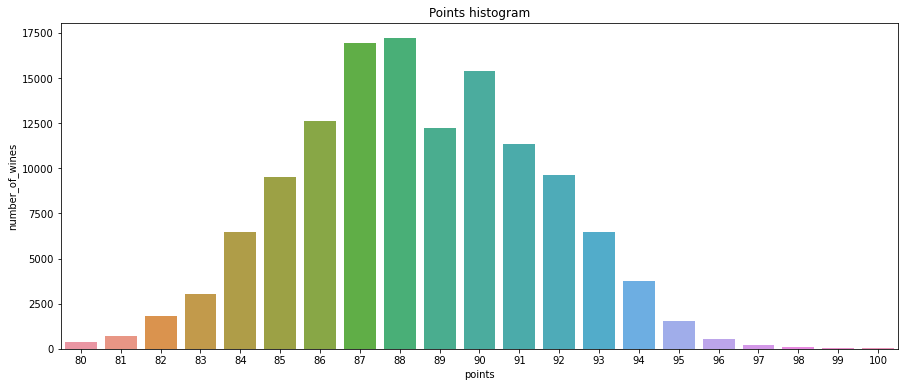

In [19]:
#直方图
temp = data_most.value_counts()
df = pd.DataFrame({'points':temp.index, 'number_of_wines':temp.values})

histogram(df, 'points', 'number_of_wines', 'Points histogram')

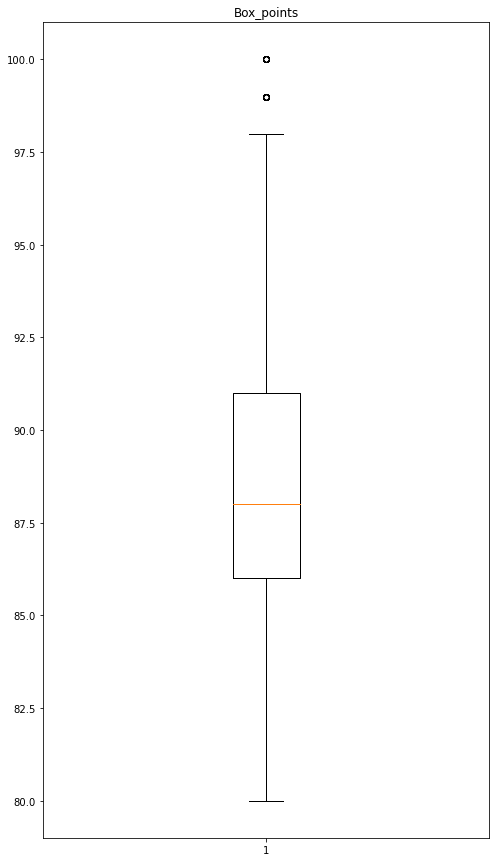

In [20]:
#盒图
fig = plt.figure(figsize=(8, 15))
plt.boxplot(data_most, notch=False, sym='o', vert=True)
t = plt.title('Box_points')
plt.show()

### 4.3 通过属性的相关关系来填补缺失值

    显而易见，葡萄酒来自的国家与葡萄酒来自的省份必然相关，可以使用province填补country
    但经过查看缺失值数量，province与country均缺失63个数据，有理由认为无法有效填充
    因此，选用仅缺失63个数据的province对缺失超过2万数据的region_1（葡萄酒产区，为省份/州，与province相同）进行填充

In [21]:
data_fill = pd.DataFrame(data, columns=['province', 'region_1'])

In [22]:
data_fill.head(10)

,province,region_1
0,Sicily & Sardinia,Etna
1,Douro,NaN
2,Oregon,Willamette Valley
3,Michigan,Lake Michigan Shore
4,Oregon,Willamette Valley
5,Northern Spain,Navarra
6,Sicily & Sardinia,Vittoria
7,Alsace,Alsace
8,Rheinhessen,NaN
9,Alsace,Alsace


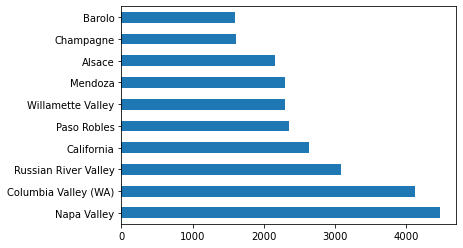

In [23]:
data_fill['region_1'].value_counts().head(10).plot.barh()

In [24]:
dict = {}
for row in data_fill.iterrows():
    dict[row[1]['province']] = row[1]['region_1']
    
for row in data_fill.iterrows():
    region = dict[row[1]['province']]
    row[1]['region_1'] = region

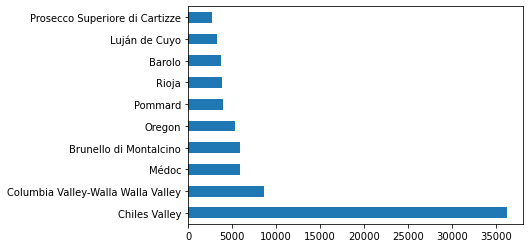

In [25]:
data_fill['region_1'].value_counts().head(10).plot.barh()

可对比填充前后 region_1属性 的各种可能（只显示前十名）频数的变化

### 4.4 通过数据对象之间的相似性来填补缺失值

In [26]:
data_sim = data[['price','points']]

In [27]:
point2price = {}
for row in data_sim.iterrows():
    if point2price.get(row[1]['points'], None):
        if not pd.isnull(row[1]['price']):
            point2price[row[1]['points']][0] += row[1]['price']
            point2price[row[1]['points']][1] += 1
    else:
        if not pd.isnull(row[1]['price']):
            point2price[row[1]['points']] = [row[1]['price'], 1]

In [28]:
for k in point2price.keys():
    point2price[k][0] = round(point2price[k][0] / point2price[k][1], 4)

In [29]:
for row in data_sim.iterrows():
    if pd.isnull(row[1]['price']):
        row[1]['price'] = point2price[row[1]['points']][0]

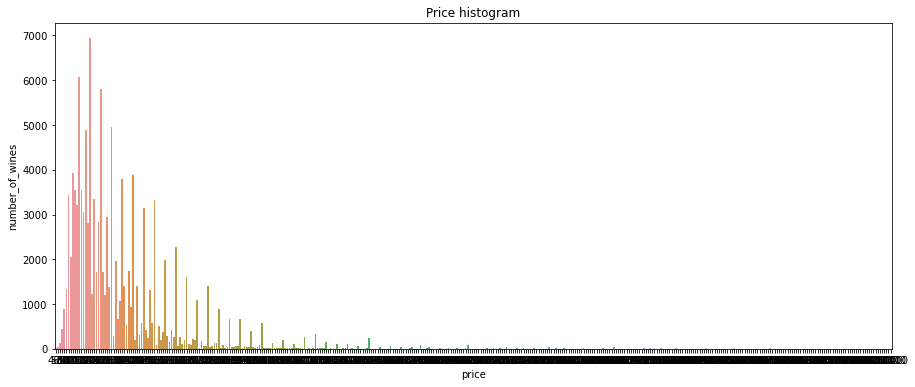

In [30]:
#对被填充后的price画直方图
temp = data_sim['price'].value_counts()
df = pd.DataFrame({'price':temp.index, 'number_of_wines':temp.values})

histogram(df, 'price', 'number_of_wines', 'Price histogram')